In [14]:
#test how many times culc 10million calc
# total_record = 1000000

# for i in range(total_record):
#     #print(i)
#     if i % 1000:
#         #print("test")
#         pass

# print("exam finisht")

#100万数えるのには1.６秒かかった


In [15]:
#test show all data in test_Data
# import csv
# file = open(r"",'r')
# data = csv.reader(file)
# i = 0
# flg = 100
# for row in data :
#     #print(row)
#     i +=1
#     if i ==flg:
#         break

# print("exam finished")    
# file.close

In [1]:
#make test data
#1実験データ読み込み
#2実験データdf変換
import numpy as np
import pandas as pd  
import os 

current_dir = os.getcwd()
print("current_dir :" + current_dir)


raw_data_path_str = r""
df = pd.read_csv(raw_data_path_str)
df.head()

current_dir :c:\Users\tarot\OneDrive\デスクトップ\20230206_thesis


FileNotFoundError: [Errno 2] No such file or directory: '.\\raw_data\\1_202211291345_yoshida_asahi.CSV'

In [17]:
#実験データを少なくする（テストデータ作成）
test_data_size = 100000
print(df.shape)
df_test_1 = df[:test_data_size]
df_test_2 = df[test_data_size:test_data_size *2 ]
print(df_test_1.shape,df_test_2.shape)




(1531000, 24)
(100000, 24) (100000, 24)


In [18]:
#実験データをcsv として出力する
##出力用ディレクトリを作成する\out として
dammy_dir_path = current_dir + "\input\dammydata"
os.makedirs(dammy_dir_path,exist_ok=True) #already existed , no error 
file_name_1 = "datasize_" +str(test_data_size) + r"_dammydata1.csv"
file_name_2 = "datasize_" +str(test_data_size) + r"_dammydata2.csv"

df_test_1.to_csv(dammy_dir_path + "/" + file_name_1)
df_test_2.to_csv(dammy_dir_path + "/" + file_name_2)


In [19]:
#show conntection bettween time and exit 
#maybe, some times exit pulce is showed 
df_test_1.head()
time_EXIT_list = ["TIME"," EXT"]
time_EXIT_list = ["CLOCK"," EXT"]

df_test_1[time_EXIT_list].head()
x_list = df_test_1["CLOCK"]
y_list = df_test_1[" EXT"]



In [20]:
import matplotlib.pyplot as plt 

# plt.plot(x_list,y_list) #10 thousands col equal 1 min and 15sec 


In [21]:
#from method import file_control


In [22]:
import os  
eeg_datas_dir = r'./input/dammydata'

files = os.listdir(eeg_datas_dir)
print(type(files))
print(files)
len(files)
print(type(files[0]))

<class 'list'>
['datasize_100000_dammydata1.csv', 'datasize_100000_dammydata2.csv']
<class 'str'>


<class 'pandas.core.series.Series'>


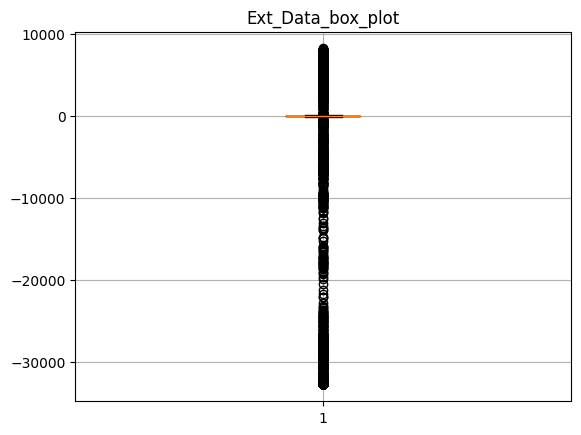

-6.0

In [23]:
eeg_df = pd.read_csv(eeg_datas_dir + "/" +files[0]) 
eeg_df.head()
threshold = -500#average(min + max)の概算
print(type(eeg_df[" EXT"]))

sample_EXT_data = eeg_df[" EXT"]
type(sample_EXT_data)
import matplotlib.pyplot as plt 
x = np.array(sample_EXT_data)
plt.title("Ext_Data_box_plot")
plt.grid()
plt.boxplot(x)
plt.show()
sample_EXT_data.quantile()

In [24]:
#threshold 

#1take max ext and min 
max_data = eeg_df[" EXT"].max()
print(max_data)
min_data = eeg_df[" EXT"].min()
print(min_data)
threshold = (max_data + min_data )/2


8241
-32768


In [25]:

trigger_tapple_index_list = [] # (begging_triiger , end_trigger_index )
bool_in_trigger = False
begin_trigger_index = 0
end_trigger_index = 0

# EXTの出力に対して　ある一定のあたいより小さいならそれをトリガーとして疑う
# 前１つと現在と後ろ２つの計４要素の平均と閾値との比較を行い，トリガーかどうかを判定する
# トリガー内と判定したら，trigger_in_bool をTrueとする
# トリガー脱出は同じ要領で判定を行う．
# 出力はタプルのリスト型として出力する
for index ,ext_temp in eeg_df[" EXT"].items():
    #print(type(ext_temp))  # int 
    #print(indx)  #int
    #print(eeg_df[" EXT"][index])
    if bool_in_trigger == False and ext_temp < threshold:#find maybe trigger 
        average_around_ext_temp = (eeg_df[" EXT"][index-1] + eeg_df[" EXT"][index] + eeg_df[" EXT"][index+1]) +eeg_df[" EXT"][index+2] /4
        if  average_around_ext_temp < threshold: 
            #print("now in trigger, index is ", str(index))
            bool_in_trigger = True #  NOW in trigger 
            begin_trigger_index = index
            #print(bool_in_trigger,begin_trigger_index,end_trigger_index)

    if bool_in_trigger == True and ext_temp >= threshold:# in trigger ,however tempExt is higher than  threshold
        #print("now , in trigger and ext_temp higher than threshold  ")
        average_around_ext_temp = (eeg_df[" EXT"][index-1] + eeg_df[" EXT"][index] + eeg_df[" EXT"][index+1]) +eeg_df[" EXT"][index+2] /4
        if  average_around_ext_temp > threshold : 
            #print("now out of trigger, index is ", str(index))
            bool_in_trigger = False #  NOW out of  trigger 
            end_trigger_index = index
            tup = begin_trigger_index,end_trigger_index
            trigger_tapple_index_list.append(tup) 
            #print(bool_in_trigger,begin_trigger_index,end_trigger_index)

#print(trigger_tapple_index_list)
#print(len(trigger_tapple_index_list))
for tapple in trigger_tapple_index_list:
    beggin , end = tapple
    diff = end - beggin
    #print(beggin, end ,diff)

type(trigger_tapple_index_list) 




list

In [26]:
#トリガーの範囲を出力する
import numpy as np
import pandas as pd
list_col = ["start","end"]
triggers_begin_and_end_df = pd.DataFrame(columns=list_col)
#print(triggers_begin_and_end_df)

for temp_tapple in trigger_tapple_index_list:
    beggin, end = temp_tapple
    temp_trigger = pd.DataFrame({"start":[beggin],"end":[end]})
    triggers_begin_and_end_df = pd.concat([triggers_begin_and_end_df,temp_trigger],ignore_index=True)

#triggers_begin_and_end_df = triggers_begin_and_end_df.rename(columns= {'0':'start' ,'1':'end'})
print(triggers_begin_and_end_df.columns)
#print(triggers_begin_and_end_df)
trigger_out_csv_dir = './input/edit_data/trigger'
os.makedirs(trigger_out_csv_dir,exist_ok=True)
trigger_csv_name = "test"
#triggers_begin_and_end_df.to_csv('test.csv')
#triggers_begin_and_end_df.to_csv(trigger_out_csv_dir + '/' + trigger_csv_name +'.csv')

class raw_csv_to_trigger_csv():
    def __int__():
        pass




Index(['start', 'end'], dtype='object')


In [27]:
def raw_csv_to_trigger_csv(raw_eeg_csv_name='',raw_eeg_csv_dir = ''):
    import numpy as np
    import pandas as pd
    #print(raw_eeg_csv_name,raw_eeg_csv_dir)
    eeg_df = pd.read_csv(raw_eeg_csv_dir ) 
    eeg_df.head()
    threshold = (max_data + min_data )/2
    
    #print(type(eeg_df[" EXT"]))

    trigger_tapple_index_list = [] # (begging_triiger , end_trigger_index )
    bool_in_trigger = False
    begin_trigger_index = 0
    end_trigger_index = 0

    # EXTの出力に対して　ある一定のあたいより小さいならそれをトリガーとして疑う
    # 前１つと現在と後ろ２つの計４要素の平均と閾値との比較を行い，トリガーかどうかを判定する
    # トリガー内と判定したら，trigger_in_bool をTrueとする
    # トリガー脱出は同じ要領で判定を行う．
    # 出力はタプルのリスト型として出力する
    for index ,ext_temp in eeg_df[" EXT"].items():
        #print(type(ext_temp))  # int 
        #print(indx)  #int
        #print(eeg_df[" EXT"][index])
        if bool_in_trigger == False and ext_temp < threshold:#find maybe trigger 
            average_around_ext_temp = (eeg_df[" EXT"][index-1] + eeg_df[" EXT"][index] + eeg_df[" EXT"][index+1]) +eeg_df[" EXT"][index+2] /4
            if  average_around_ext_temp < threshold: 
                #print("now in trigger, index is ", str(index))
                bool_in_trigger = True #  NOW in trigger 
                begin_trigger_index = index
                #print(bool_in_trigger,begin_trigger_index,end_trigger_index)

        if bool_in_trigger == True and ext_temp >= threshold:# in trigger ,however tempExt is higher than  threshold
            #print("now , in trigger and ext_temp higher than threshold  ")
            average_around_ext_temp = (eeg_df[" EXT"][index-1] + eeg_df[" EXT"][index] + eeg_df[" EXT"][index+1]) +eeg_df[" EXT"][index+2] /4
            if  average_around_ext_temp > threshold : 
                #print("now out of trigger, index is ", str(index))
                bool_in_trigger = False #  NOW out of  trigger 
                end_trigger_index = index
                tup = begin_trigger_index,end_trigger_index
                trigger_tapple_index_list.append(tup) 
                #print(bool_in_trigger,begin_trigger_index,end_trigger_index)

    #print(trigger_tapple_index_list)
    #print(len(trigger_tapple_index_list))
    for tapple in trigger_tapple_index_list:
        beggin , end = tapple
        diff = end - beggin
        #print(beggin, end ,diff)

    #print(type(trigger_tapple_index_list)) 
  
    list_col = ["trigger_start_index","trigger_end_index"]
    triggers_begin_and_end_df = pd.DataFrame(columns=list_col)
    #print(triggers_begin_and_end_df)
    
    #tapple to pandas df 
    for temp_tapple in trigger_tapple_index_list:
        beggin, end = temp_tapple
        temp_trigger = pd.DataFrame({"trigger_start_index":[beggin],"trigger_end_index":[end]})
        triggers_begin_and_end_df = pd.concat([triggers_begin_and_end_df,temp_trigger],ignore_index=True)

    #triggers_begin_and_end_df = triggers_begin_and_end_df.rename(columns= {'0':'start' ,'1':'end'})
    #print(triggers_begin_and_end_df.columns)
    #print(triggers_begin_and_end_df)
    trigger_count = len(triggers_begin_and_end_df)
    if(trigger_count== 200):#200 :10picture *(10times ) *(recall and show =2)
        print("Correct:trigger_count_is :" + str(trigger_count))
    else:
        print("ALERT, some trigger is broken, trigger count is :" + str(trigger_count))

    #print(len(triggers_begin_and_end_df))
    #output trigger data as csv 
    trigger_out_csv_dir = './input/edit_data/trigger'
    os.makedirs(trigger_out_csv_dir,exist_ok=True)
   
    #triggers_begin_and_end_df.to_csv('test.csv')
    triggers_begin_and_end_df.to_csv(trigger_out_csv_dir + '/trigger_data_' + raw_eeg_csv_name)

def return_file_list_in_dir(dir_path = ''):
    import glob
    files = glob.glob(dir_path +'/*.csv')

    # import os  

    # files = os.listdir(dir_path)
    # #print(type(files))
    # #print("file_list_is:" +str(files) +", list_len_is:" + str(len(files)))
    # #len(files)
    # #print(type(files[0]))
    return files

def make_trigger_Data_main():
    eeg_datas_dir = r'.\input\raw_csv'
    eeg_data_file_list = return_file_list_in_dir(eeg_datas_dir)
    # print(eeg_data_file_list)

    #1make_all_csv
    for csv_temp_file in eeg_data_file_list:
        #print(csv_temp_file)
        #print(str(type(csv_temp_file)))
        csv_temp_name = csv_temp_file[len(eeg_datas_dir)+1:]#eeg_dadas_dir + "/"
        print(csv_temp_name)
        #print(str(type(csv_temp_name)) + "test")
        raw_csv_to_trigger_csv(csv_temp_name,csv_temp_file)






make_trigger_Data_main()



[18654, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5830, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5808, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5829, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5826, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5812, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5827, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5807, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5814, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 5807, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5798, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5825, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5807, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5808, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 

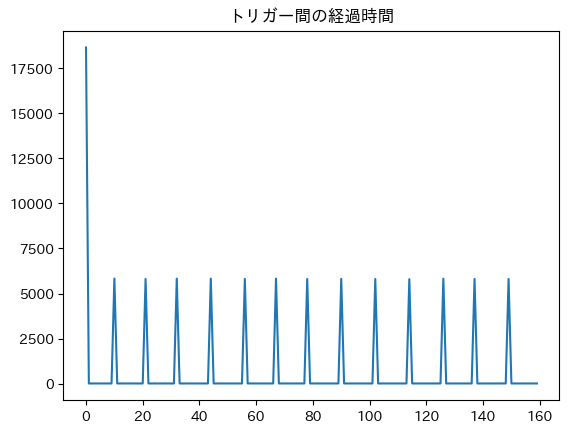

FileNotFoundError: [Errno 2] No such file or directory: './out/image/トリガー間の経過時間.png'

<Figure size 640x480 with 0 Axes>

In [28]:
import japanize_matplotlib
#トリガー間の経過時間を比較して想起か提示時間かを分析してみる
diff_bettween_trigger_list = []
for index in range(len(trigger_tapple_index_list)):
    #print(index)
    a , b = trigger_tapple_index_list[index]
    if index == 0:
        diff = a - 0
        diff_bettween_trigger_list.append(diff)
        continue
    if index +1 ==  len(trigger_tapple_index_list):
        break
    else:
        c,d = trigger_tapple_index_list[index+1]
        diff = c-b
        diff_bettween_trigger_list.append(diff)

print(diff_bettween_trigger_list)

x_list = list(range(len(diff_bettween_trigger_list)))
print(x_list)

plt.plot(x_list,diff_bettween_trigger_list,)
plt.title("トリガー間の経過時間")
plt.show()
plt.savefig("./out/image/" + "トリガー間の経過時間.png")

In [ ]:
#取り出したトリガー情報に対して正しいかどうかをチェックする．
# #トリガーの発現時間のグラフ情報とトリガーが何個発出されているか図時計算する

# # １．トリガーのファイルリストを取得する
# trigger_csv_file_list =  return_file_list_in_dir(trigger_out_csv_dir)
# print(trigger_csv_file_list)
# # ２．ｃｓｖをリストに変換する
# trigger_list = pd.read_csv(trigger_csv_file_list[0]).values.tolist()

# # df = df[["start",'end']]
# #print(df)
# # ３．リストを画像として出力する
# diff_bettween_trigger_list = []

# for index in range(len(trigger_list)):
#     # print(trigger_list[index][0])
#     # print(trigger_list[index][2])
#     diff_bettween_trigger_list.append ( trigger_list[index][2] - trigger_list[index][1])

# #print(diff_bettween_trigger_list)
# x_list = list(range(len(diff_bettween_trigger_list)))
# #print(x_list)

# plt.plot(x_list,diff_bettween_trigger_list,)
# plt.title("トリガー間の経過時間")
# plt.show()
# plt.savefig("./out/image/" + "トリガー間の経過時間２.png")

# os.makedirs(trigger_out_csv_dir+'/check_img',exist_ok = True)
# #plt.savefig(trigger_out_csv_dir+ '/check_img/' +trigger_csv_file_list[0][0:-2]+ "トリガー間の経過時間")


# # ４．トリガーの発現回数をリストの数として計算する

In [ ]:
#extract_recolling_scene
#ブランクデータを削除していく

#トリガーの一から　マイナスpadding から　トリガーから　トリガー間の秒数/2 分をデータして扱う



In [ ]:
#提示中か想起中かをわかるようにする